Hola **Rachel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 

# Análisis del Comportamiento de Usuario y Evaluación de Diseño en una Aplicación de Productos Alimenticios.

Introducción

En este proyecto, nos adentramos en el comportamiento de los usuarios de una aplicación móvil de una empresa emergente dedicada a la venta de productos alimenticios. Con el fin de optimizar la experiencia de usuario y las tasas de conversión, se analizará el embudo de ventas de la aplicación para entender en qué etapas se pierden usuarios y cuáles logran llegar a la compra. Adicionalmente, se realizará un experimento A/A/B para evaluar el impacto de una propuesta de cambio en el diseño tipográfico de la aplicación, balanceando la estética de la interfaz con la experiencia de usuario.

Objetivo

El objetivo principal de este proyecto es analizar el embudo de conversión para identificar las etapas en las que se producen mayores caídas de usuarios, así como evaluar mediante un test A/A/B si la introducción de un nuevo conjunto de fuentes afecta significativamente el comportamiento de los usuarios. De esta forma, se busca tomar decisiones basadas en datos para mejorar la retención y satisfacción de los usuarios en la aplicación.

Etapas del Análisis

Preparación de los Datos: Cargaremos y limpiaremos el dataset, formatearemos columnas y generaremos nuevas variables (fecha y hora) para facilitar el análisis.

Análisis General del Dataset: Exploraremos el periodo cubierto por los datos, identificaremos el número total de eventos y usuarios, y calcularemos la frecuencia promedio de eventos por usuario para entender el nivel general de interacción en la aplicación.

Análisis del Embudo de Conversión: Examinaremos la frecuencia de los eventos de interacción y calcularemos la proporción de usuarios que progresan de una etapa a la siguiente en el embudo de conversión, identificando dónde se produce la mayor pérdida de usuarios.

Evaluación del Test A/A/B: Analizaremos los resultados del experimento A/A/B para comparar la proporción de interacciones en los dos grupos de control y el grupo de prueba. Aplicaremos pruebas estadísticas para determinar si las diferencias entre grupos son significativas y evaluar si el cambio de fuente tipográfica afecta de forma negativa o positiva el comportamiento de los usuarios.


Conclusión:
Este análisis permitirá a la empresa tomar decisiones informadas sobre las mejoras a la aplicación, enfocándose tanto en optimizar el embudo de conversión como en evaluar si los cambios en el diseño son bien recibidos por los usuarios. Al analizar los resultados del test A/A/B, se espera obtener una recomendación sobre la implementación del nuevo diseño tipográfico, maximizando la experiencia de usuario sin comprometer la tasa de conversión.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, incluir una introducción a tu proyecto hace que tu notebook tenga una mejor presentación y sea más fácil entender el porque se va a realizar el mismo, te invito a mantener esta práctica!
</div>

In [1]:
# Importamos las librerías que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
#from scipy.stats import ttest_ind
#from scipy.stats import levene


In [2]:
# Cargamos los datasets
events = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:
# Analizamos la información del dataset 
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
# Verificamos las columnas 
events.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [5]:
# Analizamos la información 
events.describe()

,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


In [6]:
# Cambiamos los nombres de las columnas para una mejor visualización y manejo de las columnas
events.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'event_timestamp',
    'ExpId': 'experiment_id'
}, inplace=True)

events.head()

,event_name,user_id,event_timestamp,experiment_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Tienes las columnas acorde a los estándares en Python
</div>

In [7]:
# Creamos una nueva columna 'event_datetime' que convierte el timestamp en segundos a un formato de fecha y hora
events['event_datetime'] = pd.to_datetime(events['event_timestamp'], unit='s')

# Agregamos una columna solo con la fecha
events['event_date'] = events['event_datetime'].dt.date
events.head()

,event_name,user_id,event_timestamp,experiment_id,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [8]:
# Nos aseguramos de que user_id pase de int a texto
events['user_id'] = events['user_id'].astype(str)

In [9]:
# Convertimos experiment_id a categórico para mejorar la eficiencia de memoria y la velocidad de procesamiento
events['experiment_id'] = events['experiment_id'].astype('category')

In [10]:
# Verificamos todos los cambios
print(events.dtypes)

event_name                 object
user_id                    object
event_timestamp             int64
experiment_id            category
event_datetime     datetime64[ns]
event_date                 object
dtype: object


In [11]:
# Revisamos que no existan datos nulos 
events.isna().sum()

event_name         0
user_id            0
event_timestamp    0
experiment_id      0
event_datetime     0
event_date         0
dtype: int64

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Convertimos la columna EventTimestamp a formato datetime porque contiene información temporal, lo cual es esencial para realizar operaciones como calcular intervalos de tiempo, ordenar eventos cronológicamente y realizar análisis de series temporales. Utilizar este formato también mejora el rendimiento y permite aplicar funciones específicas de fechas, como pd.to_datetime(). La columna DeviceIDHash (ahora user_id) se mantiene como str porque es un identificador único y no se realizarán cálculos numéricos con ella. Al mantenerla como texto, optimizamos la memoria y el rendimiento. Finalmente, la columna ExpId (ahora experiment_id) se convierte a category si representa experimentos únicos, ya que las columnas categóricas son más eficientes en cuanto a memoria y rendimiento, especialmente cuando los valores se repiten con frecuencia, lo que facilita operaciones como agrupamientos (groupby). De este modo, cada columna está en el tipo de dato más adecuado para optimizar tanto el análisis como el uso de recursos.

Ahora procederemos con la exploración y el análisis de los datos, con el objetivo de obtener una comprensión más profunda de sus características y patrones. En esta etapa del proyecto, nos enfocaremos en estudiar y comprobar los datos para responder a varias preguntas clave, como cuántos eventos están registrados en total, cuántos usuarios y usuarias aparecen en los registros, y cuál es el promedio de eventos por usuario. También analizaremos el periodo de tiempo cubierto por los datos, identificando las fechas máxima y mínima, y trazaremos un histograma por fecha y hora. Esto nos permitirá evaluar si los datos están igualmente distribuidos a lo largo del tiempo, ya que los eventos más antiguos podrían haberse registrado por razones técnicas y sesgar los resultados generales. Identificaremos el momento en que los datos comienzan a estar completos y nos centraremos en ese intervalo. Además, analizaremos si perdimos muchos eventos y usuarios al excluir los datos más antiguos y verificaremos que haya representación de usuarios y usuarias en los tres grupos experimentales. Este análisis nos ayudará a entender la calidad de los datos y asegurarnos de que los registros sean adecuados para un análisis representativo y sin sesgos.

In [12]:
# Valores únicos en cada columna
print("Valores únicos por columna:")
for col in events.columns:
    print(f"{col}: {events[col].nunique()} valores únicos")

Valores únicos por columna:
event_name: 5 valores únicos
user_id: 7551 valores únicos
event_timestamp: 176654 valores únicos
experiment_id: 3 valores únicos
event_datetime: 176654 valores únicos
event_date: 14 valores únicos


In [13]:
# Eventos únicos
events_counts = events['event_name'].value_counts()
events_counts

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64

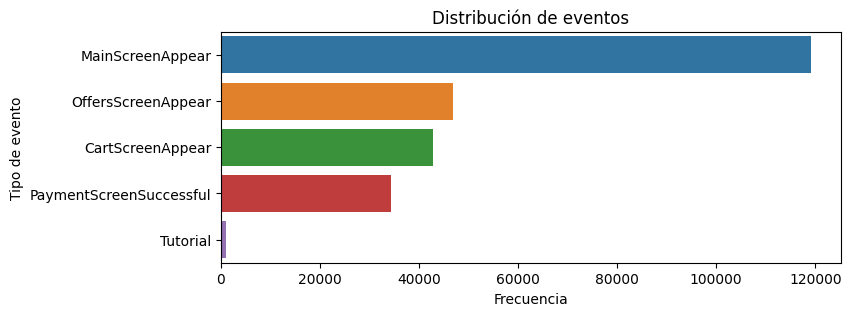

In [14]:
# Graficamos para observar mejor la distribucion de los eventos
plt.figure(figsize=(8, 3))  
sns.barplot(y=events_counts.index, x=events_counts.values)
plt.title("Distribución de eventos")
plt.xlabel("Frecuencia")
plt.ylabel("Tipo de evento")
plt.show()

In [15]:
# Número de usuarios únicos en los registros
unique_users = events['user_id'].nunique()
print(f"Usuarios únicos: {unique_users}")

Usuarios únicos: 7551


In [16]:
# Contamos el número de eventos por usuario 
events_per_user = events.groupby('user_id')['event_name'].count()
events_per_user.head()


user_id
1000608915523616548     3
100724994572555335      2
1008242126838007188    24
1009503747199967885    37
1009745980451513098    31
Name: event_name, dtype: int64

In [17]:
# Calculamos el promedio de eventos por usuario
average_events_per_user = events_per_user.mean()

print(f"Promedio de eventos por usuario: {average_events_per_user:.2f}")

Promedio de eventos por usuario: 32.33


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! También podrías revisar el promedio de eventos por cada grupo, ya que al tratarse de una prueba AB siempre se debe revisar las métricas por cada grupo experimental
</div>

In [18]:
# Calculamos los rangos de fechas para obtener la máxima y la mínima
print(f"Fecha mínima: {events['event_datetime'].min()}")
print(f"Fecha máxima: {events['event_datetime'].max()}")

Fecha mínima: 2019-07-25 04:43:36
Fecha máxima: 2019-08-07 21:15:17


In [19]:
# Calculamos los eventos por día y renombramos las columnas para claridad
events_per_day = events['event_date'].value_counts().sort_index()
events_per_day = events_per_day.reset_index()
events_per_day.columns = ['Fecha', 'Número de eventos'] 
events_per_day

,Fecha,Número de eventos
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,413
6,2019-07-31,2031
7,2019-08-01,36229
8,2019-08-02,35606
9,2019-08-03,33351


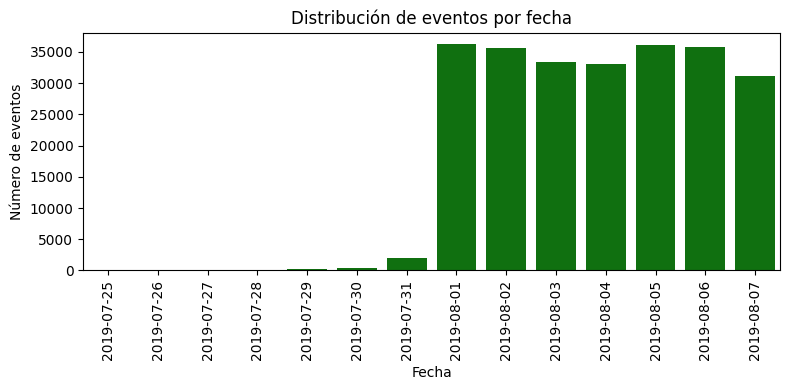

In [20]:
# Graficamos para observar mejor la distribucion de los eventos por día
plt.figure(figsize=(8, 4))
sns.barplot(x='Fecha', y='Número de eventos', data=events_per_day, color='green')
plt.title("Distribución de eventos por fecha")
plt.xlabel("Fecha")
plt.ylabel("Número de eventos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [21]:
# Calculamos los eventos por hora del día
events['hour'] = events['event_datetime'].dt.hour
events['hour'].head()


0     4
1    11
2    11
3    11
4    11
Name: hour, dtype: int64

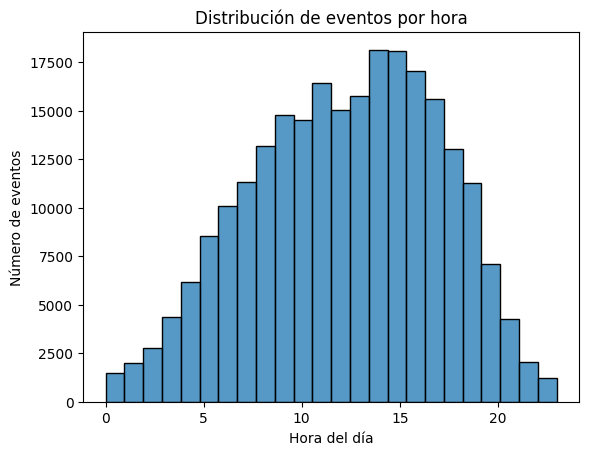

In [22]:
# Realizamos un histograma para visualizar la distribución de los eventos por hora
sns.histplot(events['hour'], bins=24)
plt.title("Distribución de eventos por hora")
plt.xlabel("Hora del día")
plt.ylabel("Número de eventos")
plt.show()

In [23]:
# Contamos eventos por fecha y hora
events_per_date_and_hour = events.groupby(['event_date', 'hour']).size().reset_index(name='n_events_per_date_and_hour')
events_per_date_and_hour.head()

,event_date,hour,n_events_per_date_and_hour
0,2019-07-25,4,1
1,2019-07-25,11,5
2,2019-07-25,14,1
3,2019-07-25,20,2
4,2019-07-26,3,1


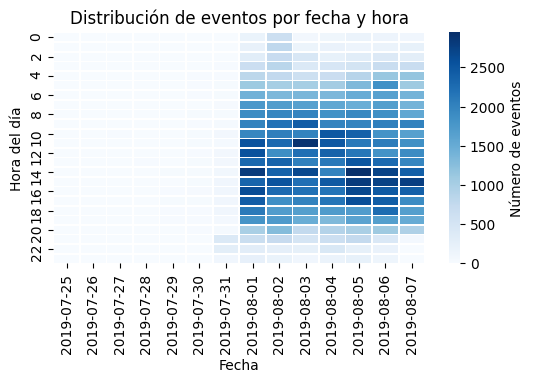

In [24]:
# Creamos una tabla pivote para visualizar la información en el mapa de calor
heatmap_data = events_per_date_and_hour.pivot(index='hour', columns='event_date', values='n_events_per_date_and_hour').fillna(0)

# Graficamos el mapa de calor
plt.figure(figsize=(6, 3))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Número de eventos'})
plt.title('Distribución de eventos por fecha y hora')
plt.xlabel('Fecha')
plt.ylabel('Hora del día')
plt.show()


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
La distribución de eventos revela un patrón claro de aumento repentino en la cantidad de eventos a partir del 31 de julio de 2019, alcanzando su pico entre el 1 y el 6 de agosto de 2019. En contraste, los días previos, del 25 al 30 de julio de 2019, muestran una cantidad de eventos considerablemente baja, casi inexistente. Este cambio podría indicar que el experimento comenzó alrededor del 31 de julio, lo que explica el incremento en los eventos. Sin embargo, si esta tendencia no es correcta, la baja cantidad de eventos podría sugerir un problema técnico o una falta de registros durante esos días. 
    

Ya no realizamos el histograma con la información sobre los días y las horas porque consideramos que no era necesario, ya que la distribución de las horas muestra una tendencia normal, con un mayor número de eventos en los horarios laborales. En su lugar, decidimos representar mejor ese conjunto de fecha y hora en un mapa de calor para una mejor comprensión.

Debido a que los datos no están igualmente completos a lo largo del período y el volumen de eventos aumenta drásticamente antes de estabilizarse, decidimos excluir los eventos registrados antes del 31 de julio de 2019, ya que podrían sesgar el análisis. Nos centraremos en el período válido: del 31 de julio de 2019 al 7 de agosto de 2019.

Al excluir los datos anteriores al 31 de julio, perderemos algunos eventos y posiblemente usuarios que interactuaron en ese período. Procederemos a analizar si estas pérdidas podrían afectar nuestro análisis.



In [25]:
# Eventos y usuarios antes del 31 de julio
eventos_antes = events[events['event_datetime'] < '2019-07-31']
print("Eventos perdidos:", len(eventos_antes))
print("Usuarios perdidos:", eventos_antes['user_id'].nunique())


Eventos perdidos: 797
Usuarios perdidos: 555


Es crucial confirmar que tenemos usuarios de los tres grupos experimentales en el periodo del 31 de julio al 7 de agosto.

In [26]:
# Verificamos que los grupos experimentales esten presentes en el periodo válido
eventos_validos = events[events['event_datetime'] >= '2019-07-31']
grupos_presentes = eventos_validos['experiment_id'].unique()
grupos_presentes


[247, 248, 246]
Categories (3, int64): [247, 248, 246]

 <div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el filtro, esto te dejará muestras de datos más consistentes
</div>


In [27]:
# Verificar el resultado
print(f"Total de eventos en el periodo válido: {len(eventos_validos)}")
print(f"Total de usuarios en el periodo válido: {eventos_validos['user_id'].nunique()}")


Total de eventos en el periodo válido: 243329
Total de usuarios en el periodo válido: 7542


In [28]:
# Verificamos usuarios únicos antes y después del 31 de julio
usuarios_validos = eventos_validos['user_id'].nunique()
usuarios_totales = events['user_id'].nunique()

print("Usuarios totales:", usuarios_totales)
print("Usuarios representados en el periodo válido:", usuarios_validos)


Usuarios totales: 7551
Usuarios representados en el periodo válido: 7542


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">

Los datos muestran que, de un total de 7551 usuarios, 7542 están representados en el período válido, lo que significa que casi todos los usuarios (99.88%) están incluidos en el análisis. La pérdida de solo 9 usuarios al excluir los datos anteriores al 31 de julio es mínima y no debería afectar significativamente los resultados, asegurando que trabajemos con datos consistentes y representativos. Además, los eventos en los primeros días son insignificantes en comparación con el resto del período, con solo 797 eventos frente a decenas de miles en los días posteriores. La inclusión de estos datos incompletos podría sesgar el análisis, especialmente si no reflejan la actividad típica durante el período principal. Aunque perderemos 555 usuarios, es probable que la mayoría de ellos también tengan actividad registrada entre el 31 de julio y el 7 de agosto, por lo que su exclusión no impactará de manera significativa el análisis global.

Debido a que la pérdida de usuarios es mínima y no afecta significativamente el análisis, nos centraremos únicamente en los usuarios que participaron en el periodo estable, es decir, después del 31 de julio.

Se realizará un análisis del embudo de eventos, comenzando por observar los eventos registrados y su frecuencia. Se ordenarán según su frecuencia y se determinará la cantidad de usuarios que realizaron cada acción, también ordenada por número de usuarios. Además, se calculará la proporción de usuarios que realizaron cada acción al menos una vez. Se evaluará el orden en que ocurrieron las acciones y si forman parte de una secuencia, aunque esto no será necesario para el cálculo del embudo. Usaremos el embudo para calcular la proporción de usuarios que pasan de una etapa a la siguiente, por ejemplo, la proporción de usuarios que pasan de la etapa A a B y de B a C. También se analizará en qué etapa se pierde la mayor cantidad de usuarios y qué porcentaje de usuarios realizan todo el recorrido desde su primer evento hasta el pago.

Comenzaremos observando qué eventos hay en los registros y su frecuencia de sucesoy los ordenaremos por frecuencia.

In [29]:
# Estudiamos la frecuencia de eventos en el periodo válido
eventos_frecuencia = eventos_validos['event_name'].value_counts()  # Número de ocurrencias por evento
print("Frecuencia de eventos ordenados por su cantidad:")
print(eventos_frecuencia)

Frecuencia de eventos ordenados por su cantidad:
MainScreenAppear           118681
OffersScreenAppear          46724
CartScreenAppear            42623
PaymentScreenSuccessful     34253
Tutorial                     1048
Name: event_name, dtype: int64


In [30]:
# Calculamos el número de usuarios únicos por evento
usuarios_por_evento = eventos_validos.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
usuarios_por_evento

event_name
MainScreenAppear           7429
OffersScreenAppear         4606
CartScreenAppear           3742
PaymentScreenSuccessful    3542
Tutorial                    845
Name: user_id, dtype: int64

In [31]:
# Calculamos la proporción de usuarios que realizaron cada evento
proporciones_users = (usuarios_por_evento / usuarios_validos)*100
proporciones_users


event_name
MainScreenAppear           98.501724
OffersScreenAppear         61.071334
CartScreenAppear           49.615487
PaymentScreenSuccessful    46.963670
Tutorial                   11.203925
Name: user_id, dtype: float64

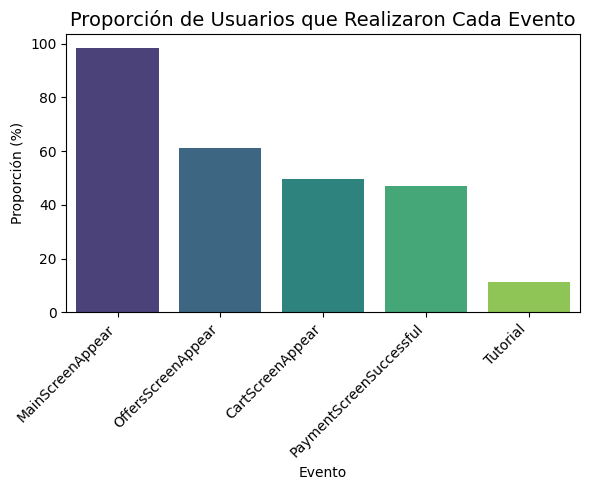

In [32]:
# Creamos un gráfico de barras para una mejor comprension sobre las proporciones de los usuarios
plt.figure(figsize=(6, 5)) 
sns.barplot(x=proporciones_users.index, y=proporciones_users.values, palette='viridis')
plt.title('Proporción de Usuarios que Realizaron Cada Evento', fontsize=14)
plt.xlabel('Evento', fontsize=10)
plt.ylabel('Proporción (%)', fontsize=10)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">

Los eventos MainScreenAppear(98.5%), OffersScreenAppear(61.1%), CartScreenAppear(49.6%), PaymentScreenSuccessful(47%) y Tutorial(11.2%) muestran un patrón en el que los primeros cuatro eventos forman un embudo lógico de conversión: los usuarios pasan de la pantalla principal a las ofertas, luego al carrito y finalmente a la pantalla de pago. Sin embargo, el evento Tutorial parece estar fuera de lugar, ya que generalmente debería ser un paso inicial en el flujo, pero aparece al final, lo que sugiere que podría no ser obligatorio o que algunos usuarios lo completan en un momento posterior. En resumen, los eventos, excepto el tutorial, siguen un flujo lógico, y si el tutorial debe ser parte del proceso, debería reubicarse al principio; de lo contrario, está bien que no todos los usuarios lo completen.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con las gráficas para visualizar el embudo, se nota claramente los pasos que deben seguir los usuarios y la conclusión es muy acertada
</div>

Procedemos a utilizar el embudo de eventos para calcular la proporción de usuarios que avanzan de una etapa a la siguiente. Específicamente, determinaremos la proporción de usuarios que pasan de una etapa a la siguiente en el embudo (por ejemplo, de A → B → C).

In [33]:
# Definimos las etapas del embudo
usuarios_etapa_A = eventos_validos[eventos_validos['event_name'] == 'MainScreenAppear']['user_id'].nunique()
usuarios_etapa_B = eventos_validos[eventos_validos['event_name'] == 'OffersScreenAppear']['user_id'].nunique()
usuarios_etapa_C = eventos_validos[eventos_validos['event_name'] == 'CartScreenAppear']['user_id'].nunique()
usuarios_etapa_D = eventos_validos[eventos_validos['event_name'] == 'PaymentScreenSuccessful']['user_id'].nunique()

# Calculamos las proporciones
proporciones_A_B = usuarios_etapa_B / usuarios_etapa_A if usuarios_etapa_A != 0 else 0
proporciones_B_C = usuarios_etapa_C / usuarios_etapa_B if usuarios_etapa_B != 0 else 0
proporciones_C_D = usuarios_etapa_D / usuarios_etapa_C if usuarios_etapa_C != 0 else 0

print(f"Proporción de usuarios de A a B (MainScreenAppear → OffersScreenAppear): {round(proporciones_A_B*100, 1)}%")
print(f"Proporción de usuarios de B a C (OffersScreenAppear → CartScreenAppear): {round(proporciones_B_C*100, 1)}%")
print(f"Proporción de usuarios de C a D (CartScreenAppear → PaymentScreenSuccessful): {round(proporciones_C_D*100, 1)}%")


Proporción de usuarios de A a B (MainScreenAppear → OffersScreenAppear): 62.0%
Proporción de usuarios de B a C (OffersScreenAppear → CartScreenAppear): 81.2%
Proporción de usuarios de C a D (CartScreenAppear → PaymentScreenSuccessful): 94.7%


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
El embudo de eventos muestra que un 38% de los usuarios abandonan entre la pantalla principal y la de ofertas (MainScreenAppear → OffersScreenAppear), pero las conversiones mejoran en las etapas siguientes, con un 81% pasando de ofertas al carrito (OffersScreenAppear → CartScreenAppear) y un 94.7% completando la compra (CartScreenAppear → PaymentScreenSuccessful). El principal punto de fricción se encuentra en la transición inicial, lo que sugiere que optimizar la visibilidad y relevancia de las ofertas podría reducir la tasa de abandono. Además, mantener el flujo de pago sencillo y sin fricciones es clave para aprovechar la alta conversión en las últimas etapas. En general, el embudo es efectivo, pero mejorar la primera etapa podría aumentar significativamente la conversión global.

In [34]:
# Calculamos la pérdida de usuarios entre las etapas
perdida_A_B = usuarios_etapa_A - usuarios_etapa_B
perdida_B_C = usuarios_etapa_B - usuarios_etapa_C
perdida_C_D = usuarios_etapa_C - usuarios_etapa_D

print(f"Pérdida de usuarios de A a B (MainScreenAppear → OffersScreenAppear): {perdida_A_B}")
print(f"Pérdida de usuarios de B a C (OffersScreenAppear → CartScreenAppear): {perdida_B_C}")
print(f"Pérdida de usuarios de C a D (CartScreenAppear → PaymentScreenSuccessful): {perdida_C_D}")

Pérdida de usuarios de A a B (MainScreenAppear → OffersScreenAppear): 2823
Pérdida de usuarios de B a C (OffersScreenAppear → CartScreenAppear): 864
Pérdida de usuarios de C a D (CartScreenAppear → PaymentScreenSuccessful): 200


In [35]:
# Determinamos en qué etapa se pierde más usuarios
perdidas = {'A → B': perdida_A_B, 'B → C': perdida_B_C, 'C → D': perdida_C_D}

df_perdidas = pd.DataFrame(list(perdidas.items()), columns=['Etapa', 'Pérdida'])
df_perdidas

,Etapa,Pérdida
0,A → B,2823
1,B → C,864
2,C → D,200


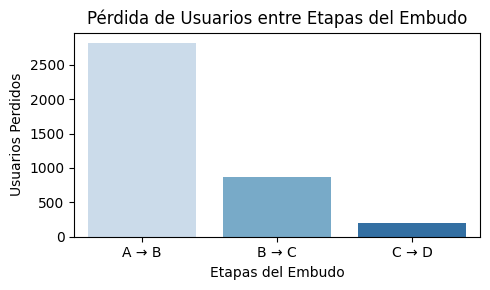

In [37]:
# Creamos la gráfica de barras para analizar las pérdidas de usuarios entre las etapas del embudo
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='Etapa', y='Pérdida', data=df_perdidas, palette='Blues')
plt.xlabel('Etapas del Embudo')
plt.ylabel('Usuarios Perdidos')
plt.title('Pérdida de Usuarios entre Etapas del Embudo')
plt.tight_layout()
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
La mayor pérdida de usuarios ocurre en la transición de la pantalla principal a las ofertas (A → B), con 2823 usuarios abandonando. Esta pérdida disminuye en las siguientes etapas, con 864 usuarios abandonando de ofertas al carrito (B → C) y solo 200 en el último paso, de carrito a pago exitoso (C → D). Esto indica que el embudo mejora en las etapas posteriores, pero la optimización de la etapa inicial podría reducir significativamente el abandono.

Ahora, analizaremos qué porcentaje de usuarios completa todo el recorrido, desde su primer evento hasta la finalización del pago.

In [38]:
# Calculamos el porcentaje de usuarios que completan el embudo
porcentaje_completaron_embudo = usuarios_etapa_D / usuarios_etapa_A * 100

print(f"Porcentaje de usuarios que completan el embudo: {porcentaje_completaron_embudo}%")


Porcentaje de usuarios que completan el embudo: 47.6780185758514%


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
El 47.68% de los usuarios completa todo el embudo, desde su primer evento hasta la finalización del pago. Esto indica que, aunque casi la mitad de los usuarios completan el proceso, hay una oportunidad significativa de optimizar las etapas intermedias para aumentar la tasa de conversión y reducir el abandono en el embudo.   

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen análisis y recomendación en base a tus datos!
</div>

A continuación, estudiaremos los resultados del experimento, comenzando por analizar cuántos usuarios hay en cada grupo, incluyendo los dos grupos de control en el test A/A, donde verificamos nuestros mecanismos y cálculos. Evaluaremos si existe una diferencia estadísticamente significativa entre las muestras 246 y 247. Luego, seleccionaremos el evento más popular y analizaremos cuántos usuarios de cada grupo realizaron esa acción, calculando su proporción y verificando si la diferencia entre los grupos es significativa y repetiremos este análisis para todos los demás eventos. Posteriormente, realizaremos el mismo procedimiento para el grupo con fuentes alteradas y compararemos los resultados con los de los grupos de control, tanto de forma aislada como combinada.

También se analizará el nivel de significancia estadística para las pruebas de hipótesis, considerando un umbral inicial de 0.1, lo que implica que uno de cada diez resultados podría ser falso. Si es necesario, ajustaremos este nivel y revisaremos los pasos anteriores para validar nuestras conclusiones.

In [39]:
# Contamos usuarios únicos en cada grupo experimental
usuarios_por_grupo = eventos_validos.groupby('experiment_id')['user_id'].nunique().reset_index()
usuarios_por_grupo.columns = ['experiment_id', 'user_count']  # Renombramos las columnas para claridad
usuarios_por_grupo

,experiment_id,user_count
0,246,2485
1,247,2517
2,248,2540


In [40]:
# Buscamos el evento más popular
evento_mas_popular = eventos_validos['event_name'].value_counts().idxmax()


print(f"El evento más popular en general es: {evento_mas_popular}")


El evento más popular en general es: MainScreenAppear


In [41]:
# Agrupamos los eventos por experimento y nombre del evento, contamos los usuarios únicos 
# y ordenamos los resultados por cantidad de usuarios, luego renombramos las columnas para mayor claridad.

usuarios_por_evento_y_grupos = eventos_validos.groupby(['experiment_id','event_name']).agg(
    {'user_id':'nunique'}).reset_index().sort_values(by=['experiment_id','user_id'],ascending=False)

usuarios_por_evento_y_grupos.columns = ['experiment_id','event_name', 'user_count']
usuarios_por_evento_y_grupos.head()

,experiment_id,event_name,user_count
11,248,MainScreenAppear,2498
12,248,OffersScreenAppear,1536
10,248,CartScreenAppear,1236
13,248,PaymentScreenSuccessful,1183
14,248,Tutorial,282


In [42]:
# Comprobamos que en todos los grupos el evento mas popular sea 'MainScreenAppear'
# Creamos una columna para ordenar de forma descendente los eventos mas populares 
usuarios_por_evento_y_grupos['orden'] = usuarios_por_evento_y_grupos.groupby('experiment_id').cumcount()+1
top_eventos_por_grupo = usuarios_por_evento_y_grupos[usuarios_por_evento_y_grupos['orden']==1][['experiment_id','event_name','user_count']]
top_eventos_por_grupo

,experiment_id,event_name,user_count
11,248,MainScreenAppear,2498
6,247,MainScreenAppear,2479
1,246,MainScreenAppear,2452


In [43]:
# Contamos los usuarios que realizaron el evento más popular en cada grupo de control
usuarios_unicos_246 =top_eventos_por_grupo.loc[top_eventos_por_grupo['experiment_id'] == 246, 'user_count'].values[0]
usuarios_unicos_247 = top_eventos_por_grupo.loc[top_eventos_por_grupo['experiment_id'] == 247, 'user_count'].values[0]
usuarios_unicos_248 = top_eventos_por_grupo.loc[top_eventos_por_grupo['experiment_id'] == 248, 'user_count'].values[0]

print(f"Número de usuarios que realizaron el evento más popular en grupo 246: {usuarios_unicos_246}")
print(f"Número de usuarios que realizaron el evento más popular en grupo 247: {usuarios_unicos_247}")
print(f"Número de usuarios que realizaron el evento más popular en grupo 248: {usuarios_unicos_248}")

Número de usuarios que realizaron el evento más popular en grupo 246: 2452
Número de usuarios que realizaron el evento más popular en grupo 247: 2479
Número de usuarios que realizaron el evento más popular en grupo 248: 2498


In [44]:
# Calculamos proporciones por cada grupo sobre el evento más popular
proporcion_246 = usuarios_unicos_246 / usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 246, 'user_count'].values[0]
proporcion_247 = usuarios_unicos_247 / usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 247, 'user_count'].values[0]
proporcion_248 = usuarios_unicos_248 / usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 248, 'user_count'].values[0]


print(f"Proporción de usuarios que realizaron el evento más popular en el grupo 246: {round(proporcion_246*100, 1)}%")
print(f"Proporción de usuarios que realizaron el evento más popular en el grupo 247: {round(proporcion_247*100, 1)}%")
print(f"Proporción de usuarios que realizaron el evento más popular en el grupo 248: {round(proporcion_248*100, 1)}%")

Proporción de usuarios que realizaron el evento más popular en el grupo 246: 98.7%
Proporción de usuarios que realizaron el evento más popular en el grupo 247: 98.5%
Proporción de usuarios que realizaron el evento más popular en el grupo 248: 98.3%


In [45]:
# Función para realizar la prueba de diferencia de proporciones
def test_proporciones(proporcion_1, n_1, proporcion_2, n_2):
    # Realizamos la prueba z de diferencia de proporciones
    z_score, p_value = sm.stats.proportions_ztest([proporcion_1 * n_1, proporcion_2 * n_2], [n_1, n_2])
    return z_score, p_value

In [46]:
# Realizamos la prueba entre los grupos de control 246 y 247
z_score_246_247, p_value_246_247 = test_proporciones(
    proporcion_246, usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 246, 'user_count'].values[0],
                                                     
    proporcion_247, usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 247, 'user_count'].values[0])

print(f"Prueba entre grupos 246 y 247:")
print(f"Z-score (246 vs 247): {z_score_246_247}, P-value (246 vs 247): {p_value_246_247}")

Prueba entre grupos 246 y 247:
Z-score (246 vs 247): 0.5433662131839705, P-value (246 vs 247): 0.586877683651296


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Prueba entre grupos 246 y 247:

Z-score (0.543): Este valor bajo sugiere que la diferencia entre los dos grupos no es significativa desde el punto de vista estadístico.
P-value (0.587): Este valor es mucho mayor que el umbral de significancia de 0.1, lo que indica que no podemos rechazar la hipótesis nula, es decir, no hay evidencia suficiente para afirmar que existe una diferencia significativa entre los dos grupos.


Por lo que podemos concluir que no hay diferencia estadística significativa entre el grupo 246 y el grupo 247. Esto sugiere que los dos grupos tienen comportamientos similares en relación al evento más popular. Con un nivel de significancia de 0.1, concluimos que los dos grupos de control están bien equilibrados y presentan un comportamiento similar en cuanto a la realización del evento más popular.



Ahora procedemos a analizar si existe una diferencia estadísticamente significativa entre el grupo de experimentación 248 y los grupos de control 246 y 247.

In [47]:
# Realizamos la prueba entre el grupo con fuentes alteradas (248) y el grupo de control 246
z_score_248_246, p_value_248_246 = test_proporciones(
    proporcion_248, usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 248, 'user_count'].values[0],
    proporcion_246, usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 246, 'user_count'].values[0])


print(f"Prueba entre grupo 248 (fuentes alteradas) y 246 (grupo control):")
print(f"Z-score (248 vs 246): {z_score_248_246}, P-value (248 vs 246): {p_value_248_246}")


Prueba entre grupo 248 (fuentes alteradas) y 246 (grupo control):
Z-score (248 vs 246): -0.9516266005609376, P-value (248 vs 246): 0.341286386031747


In [48]:
# Realizamos la prueba entre el grupo con fuentes alteradas (248) y el grupo de control 247
z_score_248_247, p_value_248_247 = test_proporciones(
    proporcion_248, usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 248, 'user_count'].values[0],
    proporcion_247, usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 247, 'user_count'].values[0])

print(f"Prueba entre grupo 248 (fuentes alteradas) y 247 (grupo control):")
print(f"Z-score (248 vs 247): {z_score_248_247}, P-value (248 vs 247): {p_value_248_247}")

Prueba entre grupo 248 (fuentes alteradas) y 247 (grupo control):
Z-score (248 vs 247): -0.4097922080317102, P-value (248 vs 247): 0.6819583826039272


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Prueba entre el grupo 248 (fuentes alteradas) y el grupo 246 (control):

Z-score (-0.952): Este valor cercano a 0 sugiere que la diferencia entre los grupos 248 y 246 es pequeña.
P-value (0.341): Este p-value es mucho mayor que el umbral de significancia de 0.1, lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula. Es decir, no hay una diferencia estadísticamente significativa entre los dos grupos.

Prueba entre el grupo 248 (fuentes alteradas) y el grupo 247 (control):
Z-score (-0.410): Similar al resultado anterior, este valor indica una pequeña diferencia entre los grupos 248 y 247.
P-value (0.682): Este p-value es también mucho mayor que 0.1, lo que significa que no podemos rechazar la hipótesis nula. No se observa una diferencia estadísticamente significativa entre estos dos grupos.

En conclusión, en ambos casos, entre el grupo 248 (fuentes alteradas) y los grupos de control 246 y 247, no encontramos diferencias estadísticamente significativas. Los p-values altos (mayores que 0.1) sugieren que no hay evidencia suficiente para afirmar que las fuentes alteradas (grupo 248) tengan un impacto diferente en comparación con los grupos de control. Esto indica que los resultados de los grupos 248 y de control son estadísticamente similares.

Ahora vamos a combinar los grupos de control para determinar si, al analizarlos juntos, presentan un nivel de significancia diferente en comparación con el grupo 248.

In [49]:
# Combinamos los grupos 246 y 247 para obtener los resultados combinados
usuarios_combinados_control = usuarios_unicos_246 + usuarios_unicos_247
n_combinado_control = usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 246, 'user_count'].values[0] + usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 247, 'user_count'].values[0]

# Calculamos la proporción combinada de los grupos 246 + 247
proporcion_combinado_control = usuarios_combinados_control / n_combinado_control
proporcion_combinado_control

0.9858056777289085

In [50]:
# Realizamos la prueba entre el grupo con fuentes alteradas (248) 
#y los resultados combinados de los grupos de control (246 + 247)
z_score_248_combinado, p_value_248_combinado = test_proporciones(
    proporcion_248, usuarios_por_grupo.loc[usuarios_por_grupo['experiment_id'] == 248, 'user_count'].values[0],
    proporcion_combinado_control, n_combinado_control)

print(f"Prueba entre grupo 248 (fuentes alteradas) y los grupos combinados 246 + 247:")
print(f"Z-score (248 vs combinados): {z_score_248_combinado}, P-value (248 vs combinados): {p_value_248_combinado}")

Prueba entre grupo 248 (fuentes alteradas) y los grupos combinados 246 + 247:
Z-score (248 vs combinados): -0.7909509163562825, P-value (248 vs combinados): 0.42897263461182156


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
La prueba entre el grupo 248 (fuentes alteradas) y los grupos combinados 246 + 247 muestra un p-value de 0.429, lo que es mayor que el umbral de significancia de 0.1. Esto indica que no hay una diferencia estadísticamente significativa entre el grupo 248 y los grupos combinados de control. Los resultados sugieren que las fuentes alteradas no tienen un impacto diferente en comparación con los grupos de control.

Repetiremos el procedimiento para todos los demás eventos, realizando las pruebas de hipótesis entre los grupos de control y el grupo de experimentación (248). Para cada evento, calcularemos el Z-score y el p-value, lo que nos permitirá determinar si existe una diferencia estadísticamente significativa en la realización de ese evento entre los grupos. 

In [51]:
# Recordamos los eventos que existen
eventos = usuarios_por_evento_y_grupos['event_name'].unique()
eventos

array(['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear',
       'PaymentScreenSuccessful', 'Tutorial'], dtype=object)

In [52]:
# Obtenemos el total de usuarios únicos por grupo (sumando 'user_count' de todos los eventos por grupo)
total_246 = usuarios_por_evento_y_grupos[usuarios_por_evento_y_grupos['experiment_id'] == 246]['user_count'].sum()
total_247 = usuarios_por_evento_y_grupos[usuarios_por_evento_y_grupos['experiment_id'] == 247]['user_count'].sum()
total_248 = usuarios_por_evento_y_grupos[usuarios_por_evento_y_grupos['experiment_id'] == 248]['user_count'].sum()

print(f"Total usuarios grupo 246: {total_246}")
print(f"Total usuarios grupo 247: {total_247}")
print(f"Total usuarios grupo 248: {total_248}")


Total usuarios grupo 246: 6741
Total usuarios grupo 247: 6688
Total usuarios grupo 248: 6735


In [53]:
# Creamos una función que calcule la proporción de usuarios para cada evento y grupo
def calcular_proporciones_por_evento(grupo, evento):
    total_usuarios_grupo = usuarios_por_evento_y_grupos[usuarios_por_evento_y_grupos['experiment_id'] == grupo]['user_count'].sum()
    usuarios_evento_grupo = usuarios_por_evento_y_grupos[(usuarios_por_evento_y_grupos['experiment_id'] == grupo) & 
                                                         (usuarios_por_evento_y_grupos['event_name'] == evento)]['user_count'].values[0]
    return usuarios_evento_grupo / total_usuarios_grupo

In [54]:
# Comparamos las proporciones de cada evento en los tres grupos
proporciones = {}

for evento in eventos:
    proporciones[evento] = {
        '246': calcular_proporciones_por_evento(246, evento),
        '247': calcular_proporciones_por_evento(247, evento),
        '248': calcular_proporciones_por_evento(248, evento)
    }

# Mostramos las proporciones para cada evento por cada grupo
for evento, proporciones_evento in proporciones.items():
    print(f"Evento: {evento}")
    print(f"Proporción en grupo 246: {proporciones_evento['246']:.4f}")
    print(f"Proporción en grupo 247: {proporciones_evento['247']:.4f}")
    print(f"Proporción en grupo 248: {proporciones_evento['248']:.4f}")
    print("-" * 40)

Evento: MainScreenAppear
Proporción en grupo 246: 0.3637
Proporción en grupo 247: 0.3707
Proporción en grupo 248: 0.3709
----------------------------------------
Evento: OffersScreenAppear
Proporción en grupo 246: 0.2290
Proporción en grupo 247: 0.2282
Proporción en grupo 248: 0.2281
----------------------------------------
Evento: CartScreenAppear
Proporción en grupo 246: 0.1880
Proporción en grupo 247: 0.1853
Proporción en grupo 248: 0.1835
----------------------------------------
Evento: PaymentScreenSuccessful
Proporción en grupo 246: 0.1780
Proporción en grupo 247: 0.1733
Proporción en grupo 248: 0.1756
----------------------------------------
Evento: Tutorial
Proporción en grupo 246: 0.0412
Proporción en grupo 247: 0.0426
Proporción en grupo 248: 0.0419
----------------------------------------


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Las proporciones muestran que los tres grupos tienen comportamientos bastante similares a lo largo de las diferentes etapas del embudo, lo que sugiere que no hay diferencias significativas en la participación de los usuarios entre los grupos de control (246 y 247) y el grupo de experimentación (248). Esto indica que las fuentes alteradas (grupo 248) no tienen un efecto evidente sobre la participación de los usuarios en comparación con los grupos de control.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Revisar si hay diferencias en cada etapa del embudo puede indicar en que punto sucedió algo que alterara o no el comportamiento de los usuarios
</div>

Lo siguiente consiste en calcular las proporciones combinadas para los grupos de control 246 y 247. Esto nos permitirá obtener una visión global de la participación de los usuarios en ambos grupos antes de comparar con el grupo de experimentación 248.

In [55]:
# Función para calcular las proporciones combinadas para los grupos 246 y 247
def calcular_proporciones_combinadas(grupo1, grupo2, evento):
    # Sumamos el número de usuarios por evento en cada grupo
    usuarios_grupo1 = usuarios_por_evento_y_grupos[(usuarios_por_evento_y_grupos['experiment_id'] == grupo1) & 
                                                  (usuarios_por_evento_y_grupos['event_name'] == evento)]['user_count'].values[0]
    usuarios_grupo2 = usuarios_por_evento_y_grupos[(usuarios_por_evento_y_grupos['experiment_id'] == grupo2) & 
                                                  (usuarios_por_evento_y_grupos['event_name'] == evento)]['user_count'].values[0]

    # Calculamos el total de usuarios en los dos grupos combinados
    total_grupo1 = usuarios_por_evento_y_grupos[usuarios_por_evento_y_grupos['experiment_id'] == grupo1]['user_count'].sum()
    total_grupo2 = usuarios_por_evento_y_grupos[usuarios_por_evento_y_grupos['experiment_id'] == grupo2]['user_count'].sum()
    
    # Total de usuarios combinados
    total_combinados = total_grupo1 + total_grupo2
    
    # Total de usuarios que realizaron el evento en los dos grupos combinados
    total_evento_combinados = usuarios_grupo1 + usuarios_grupo2
    
    # Calculamos la proporción para el evento en los grupos de control combinados
    return total_evento_combinados / total_combinados


In [56]:
# Ahora calculamos las proporciones para cada evento en los grupos de control combinados (246 + 247)
eventos = usuarios_por_evento_y_grupos['event_name'].unique()  # Lista de eventos
proporciones_combinadas_control = {}

for evento in eventos:
    proporciones_combinadas_control[evento] = calcular_proporciones_combinadas(246, 247, evento)

# Mostramos las proporciones de los grupos de control combinados para cada evento
for evento, proporcion in proporciones_combinadas_control.items():
    print(f"Evento: {evento} - Proporción en los grupos de control combinados (246 + 247): {proporcion*100:.1f}%")

Evento: MainScreenAppear - Proporción en los grupos de control combinados (246 + 247): 36.7%
Evento: OffersScreenAppear - Proporción en los grupos de control combinados (246 + 247): 22.9%
Evento: CartScreenAppear - Proporción en los grupos de control combinados (246 + 247): 18.7%
Evento: PaymentScreenSuccessful - Proporción en los grupos de control combinados (246 + 247): 17.6%
Evento: Tutorial - Proporción en los grupos de control combinados (246 + 247): 4.2%


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Las proporciones en los grupos de control combinados (246 + 247) muestran una caída gradual en la participación a lo largo del embudo de eventos: 36.7% en MainScreenAppear, 22.9% en OffersScreenAppear, 18.7% en CartScreenAppear, 17.6% en PaymentScreenSuccessful y solo 4.2% en Tutorial. Estas proporciones reflejan el comportamiento esperado en un embudo de conversión y servirán para comparar los resultados con el grupo de experimentación (248) y evaluar el impacto de las fuentes alteradas.

Ahora procederemos a calcular las proporciones de usuarios que realizaron cada evento en el grupo 248 (con fuentes alteradas). Esto nos permitirá comparar el comportamiento de este grupo con el de los grupos de control y evaluar el impacto de las fuentes alteradas en la participación en cada evento.

In [57]:
# Función para calcular la proporción de usuarios para el grupo 248 (fuentes alteradas)
def calcular_proporcion_grupo_248(evento):
    usuarios_grupo_248 = usuarios_por_evento_y_grupos[(usuarios_por_evento_y_grupos['experiment_id'] == 248) & 
                        (usuarios_por_evento_y_grupos['event_name'] == evento)]['user_count'].values[0]
    
    total_grupo_248 = usuarios_por_evento_y_grupos[usuarios_por_evento_y_grupos['experiment_id'] == 248]['user_count'].sum()
    
    return usuarios_grupo_248 / total_grupo_248

# Calculamos las proporciones para cada evento en el grupo 248
proporciones_248 = {}

for evento in eventos:
    proporciones_248[evento] = calcular_proporcion_grupo_248(evento)

# Mostramos las proporciones del grupo 248 para cada evento
for evento, proporcion in proporciones_248.items():
    print(f"Evento: {evento} - Proporción en el grupo 248 (fuentes alteradas): {proporcion*100:.1f}%")


Evento: MainScreenAppear - Proporción en el grupo 248 (fuentes alteradas): 37.1%
Evento: OffersScreenAppear - Proporción en el grupo 248 (fuentes alteradas): 22.8%
Evento: CartScreenAppear - Proporción en el grupo 248 (fuentes alteradas): 18.4%
Evento: PaymentScreenSuccessful - Proporción en el grupo 248 (fuentes alteradas): 17.6%
Evento: Tutorial - Proporción en el grupo 248 (fuentes alteradas): 4.2%


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Los resultados del grupo 248 (con fuentes alteradas) muestran proporciones de participación muy similares a las de los grupos de control. La participación en cada evento sigue un patrón comparable, con pequeñas diferencias que no son significativas. Esto sugiere que las fuentes alteradas no han tenido un impacto notable en el comportamiento de los usuarios dentro del embudo de eventos, lo que indica que las modificaciones en las fuentes no afectaron significativamente las interacciones.

Ahora procederemos a comparar las proporciones de los grupos de control combinados con las del grupo 248 (con fuentes alteradas). Con las proporciones de ambos conjuntos de grupos ya calculadas, podemos evaluar las diferencias y determinar si las fuentes alteradas tienen algún impacto significativo en el comportamiento de los usuarios.

In [58]:
# Comparamos los resultados de las proporciones de los grupos de control combinados y el grupo de experimentación. 
for evento in eventos:
    proporcion_control_combinado = proporciones_combinadas_control[evento]
    proporcion_248 = proporciones_248[evento]
    
    print(f"Evento: {evento}")
    print(f"Proporción en los grupos de control combinados (246 + 247): {proporcion_control_combinado*100:.1f}%")
    print(f"Proporción en el grupo 248 (fuentes alteradas): {proporcion_248*100:.1f}%")
    
    print("-" * 40)


Evento: MainScreenAppear
Proporción en los grupos de control combinados (246 + 247): 36.7%
Proporción en el grupo 248 (fuentes alteradas): 37.1%
----------------------------------------
Evento: OffersScreenAppear
Proporción en los grupos de control combinados (246 + 247): 22.9%
Proporción en el grupo 248 (fuentes alteradas): 22.8%
----------------------------------------
Evento: CartScreenAppear
Proporción en los grupos de control combinados (246 + 247): 18.7%
Proporción en el grupo 248 (fuentes alteradas): 18.4%
----------------------------------------
Evento: PaymentScreenSuccessful
Proporción en los grupos de control combinados (246 + 247): 17.6%
Proporción en el grupo 248 (fuentes alteradas): 17.6%
----------------------------------------
Evento: Tutorial
Proporción en los grupos de control combinados (246 + 247): 4.2%
Proporción en el grupo 248 (fuentes alteradas): 4.2%
----------------------------------------


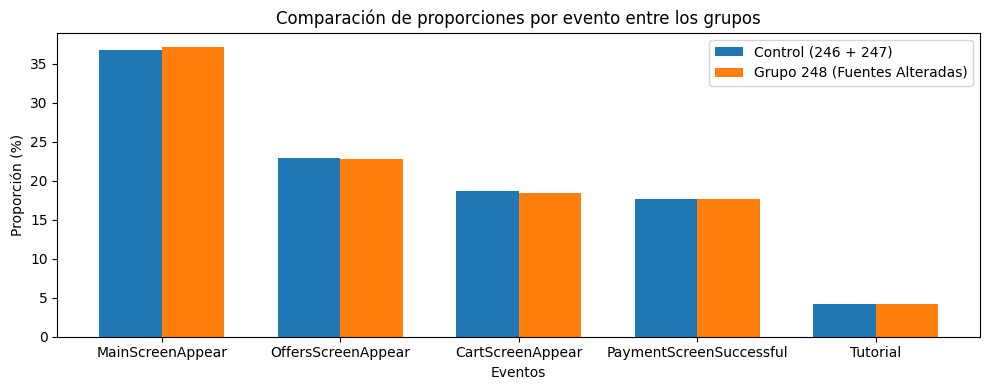

In [59]:
# Graficamos para una mejor visualización de la información 
# Extraemos los datos
eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']
proporciones_control = [36.7, 22.9, 18.7, 17.6, 4.2]
proporciones_248 = [37.1, 22.8, 18.4, 17.6, 4.2]


x = np.arange(len(eventos))  # Las posiciones en el eje x
width = 0.35  # El ancho de las barras
fig, ax = plt.subplots(figsize=(10, 4))

# Barras para los grupos de control combinados y el grupo 248
bars_control = ax.bar(x - width/2, proporciones_control, width, label='Control (246 + 247)')
bars_248 = ax.bar(x + width/2, proporciones_248, width, label='Grupo 248 (Fuentes Alteradas)')


ax.set_xlabel('Eventos')
ax.set_ylabel('Proporción (%)')
ax.set_title('Comparación de proporciones por evento entre los grupos')
ax.set_xticks(x)
ax.set_xticklabels(eventos)
ax.legend()
plt.tight_layout()
plt.show()


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Las proporciones de los eventos entre los grupos de control combinados y el grupo con fuentes alteradas son muy similares. La diferencia más grande se observa en el evento "MainScreenAppear", con una ligera ventaja para el grupo 248 (37.1% frente a 36.7%), pero en los demás eventos, las proporciones son prácticamente idénticas. Esto sugiere que las fuentes alteradas no tuvieron un impacto significativo en el comportamiento de los usuarios.

Después de realizar más de 20 pruebas de hipótesis estadísticas, calculadas considerando 4 comparaciones para cada uno de los 5 eventos analizados (comparando los grupos 246 vs 247, 248 vs 246, 248 vs 247 y 248 vs los grupos combinados 246+247), además de las pruebas en las que calculamos solo para el evento más popular, en las cuales establecimos un nivel de significancia de 0.1. Sin embargo, dado que con este nivel de significancia existe un riesgo de que uno de cada 10 resultados sea falso, hemos considerado necesario ajustar dicho nivel. Por lo tanto, procederemos a recalcular las pruebas y revisar nuestras conclusiones.

Para esto, utilizaremos la prueba de Mann-Whitney U, que consideramos adecuada en este caso, ya que al comparar grupos independientes (como los grupos de control 246 y 247, y el grupo experimental 248), es probable que los datos no sigan distribuciones normales. Esto hace que una prueba no paramétrica sea más apropiada. Además, aplicaremos el ajuste de Bonferroni, cuyo objetivo es reducir la probabilidad de cometer un error tipo I (falsos positivos) cuando se realizan múltiples comparaciones. Dado que al realizar muchas pruebas aumenta el riesgo de obtener resultados falsos positivos, el ajuste de Bonferroni ajusta el umbral de significancia dividiendo el nivel de significancia original entre el número de pruebas realizadas.

In [60]:
# Definiremos el número de eventos y el número de comparaciones
# Número de eventos
n_eventos = len(eventos)

# Número de comparaciones entre los grupos (246 vs 247, 246 vs 248, 247 vs 248)
comparaciones_por_evento = 3

# Total de pruebas estadísticas realizadas
numero_de_pruebas = n_eventos * comparaciones_por_evento

# Realizamos ajuste de Bonferroni (α ajustado)
alpha_original = 0.1
alpha_ajustado = alpha_original / numero_de_pruebas

print(f"Nivel de significancia ajustado (Bonferroni): {alpha_ajustado}")

Nivel de significancia ajustado (Bonferroni): 0.006666666666666667


**Nuestras hipotesis son las siguientes:**

La hipótesis nula (H₀): no existe una diferencia real entre los dos grupos que estamos comparando. 

Hipótesis Alternativa (H₁): sí existe una diferencia significativa entre los grupos comparados.

In [61]:
# Realizamos las pruebas de hipótesis y comparar con el nivel de significancia ajustado
resultados_pruebas = []

for evento in eventos:
    # Filtrar los datos para cada evento
    control_246 = usuarios_por_evento_y_grupos[(usuarios_por_evento_y_grupos['experiment_id'] == 246) 
    & (usuarios_por_evento_y_grupos['event_name'] == evento)]['user_count'].values[0]
    
    control_247 = usuarios_por_evento_y_grupos[(usuarios_por_evento_y_grupos['experiment_id'] == 247) 
    & (usuarios_por_evento_y_grupos['event_name'] == evento)]['user_count'].values[0]
    
    experimental_248 = usuarios_por_evento_y_grupos[(usuarios_por_evento_y_grupos['experiment_id'] == 248) 
    & (usuarios_por_evento_y_grupos['event_name'] == evento)]['user_count'].values[0]
    
    # Prueba 1: Comparar 246 vs 247
    stat_246_247, p_246_247 = mannwhitneyu([control_246], [control_247], alternative='two-sided')
    
    # Prueba 2: Comparar 246 vs 248
    stat_246_248, p_246_248 = mannwhitneyu([control_246], [experimental_248], alternative='two-sided')
    
    # Prueba 3: Comparar 247 vs 248
    stat_247_248, p_247_248 = mannwhitneyu([control_247], [experimental_248], alternative='two-sided')
    
    # Guardamos los resultados de las pruebas junto con los p-values y la comparación con el α ajustado
    resultados_pruebas.append({
        'Evento': evento,
        'P-value 246 vs 247': p_246_247,
        'Rechazo H0 (246 vs 247)': p_246_247 < alpha_ajustado,
        'P-value 246 vs 248': p_246_248,
        'Rechazo H0 (246 vs 248)': p_246_248 < alpha_ajustado,
        'P-value 247 vs 248': p_247_248,
        'Rechazo H0 (247 vs 248)': p_247_248 < alpha_ajustado
    })


In [62]:
df_resultados = pd.DataFrame(resultados_pruebas)
df_resultados

,Evento,P-value 246 vs 247,Rechazo H0 (246 vs 247),P-value 246 vs 248,Rechazo H0 (246 vs 248),P-value 247 vs 248,Rechazo H0 (247 vs 248)
0,MainScreenAppear,1.0,False,1.0,False,1.0,False
1,OffersScreenAppear,1.0,False,1.0,False,1.0,False
2,CartScreenAppear,1.0,False,1.0,False,1.0,False
3,PaymentScreenSuccessful,1.0,False,1.0,False,1.0,False
4,Tutorial,1.0,False,1.0,False,1.0,False


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Para todos los eventos (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful y Tutorial), los p-values son 1.0, lo que indica que no se observan diferencias significativas entre los grupos comparados (246 vs 247, 246 vs 248, 247 vs 248).

Dado que no rechazamos la hipótesis nula (H₀), podemos concluir que no hay suficiente evidencia estadística para afirmar que los cambios entre los grupos de control y el grupo con fuentes alteradas (248) tengan un impacto significativo en los eventos observados.

**Conclusión General**

*Análisis de la Distribución de Eventos:*
Se observó un cambio notable en la cantidad de eventos a partir del 31 de julio de 2019, lo que sugiere que el experimento comenzó en esa fecha. La exclusión de los primeros días no afectó significativamente los resultados, ya que la pérdida de 9 usuarios fue mínima y los eventos de esos días no aportaban información relevante.

*Embudo de Eventos:*
Los usuarios siguen un patrón lógico de conversión: de la pantalla principal a las ofertas, luego al carrito y finalmente al pago. El mayor abandono ocurre entre MainScreenAppear y OffersScreenAppear (38%), pero la conversión mejora en las siguientes etapas. Un 47.68% completa todo el embudo, sugiriendo oportunidades de optimización en las etapas intermedias.

*Análisis de las Pruebas A/A/B:*
No se encontraron diferencias estadísticamente significativas entre los grupos de control (246 y 247) y el grupo con fuentes alteradas (248). Esto indica que las fuentes alteradas no impactaron significativamente el comportamiento de los usuarios en el embudo de eventos, con comportamientos similares en todos los grupos.

*Proporciones de Participación:*
Las proporciones de participación entre los grupos fueron muy similares, con una ligera ventaja para el grupo 248 en el evento MainScreenAppear (37.1% frente a 36.7%). Sin embargo, no se observaron diferencias significativas en los demás eventos, lo que refuerza la conclusión de que las fuentes alteradas no tuvieron un impacto notable sobre el comportamiento de los usuarios.


***Recomendaciones sobre el Cambio de Fuentes:***

Sin Impacto Significativo de las Fuentes Alteradas:
Los resultados del test A/A/B muestran que las fuentes alteradas no afectan la participación ni la conversión de los usuarios, lo que sugiere que el cambio de fuentes no es problemático. Los usuarios no perciben las fuentes alteradas como intimidantes ni disruptivas.

Consideraciones para la Decisión de Diseño:
Aunque existe la preocupación de que el cambio de fuentes pueda resultar intimidante, los resultados del test A/A/B respaldan la implementación de las fuentes alteradas sin temor a un impacto negativo. La gerencia podría considerar que el cambio es seguro, pero es recomendable monitorear el comportamiento de los usuarios después de la implementación para detectar posibles efectos no previstos.



**Recomendaciones Adicionales:**

Optimización del Embudo de Eventos:
La mayor oportunidad de mejora está en la etapa de transición entre MainScreenAppear y OffersScreenAppear, donde se pierde un 38% de los usuarios. Mejorar la visibilidad y relevancia de las ofertas podría reducir el abandono.
También se recomienda reubicar el evento Tutorial al principio del flujo si es obligatorio.

Monitoreo Post-Implementación del Diseño:
Se sugiere realizar un seguimiento continuo del impacto del cambio de fuentes en el comportamiento de los usuarios, para asegurar que no haya efectos negativos no detectados. Esto podría incluir análisis de satisfacción o retroalimentación directa de los usuarios.

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito Rachel! Realizaste un muy buen análisis de los grupos de tratamiento entre los cambios obtenidos entre uno y otro respecto al funnel que el usuario debe seguir, tus conclusiones son muy acertadas y siempre argumentadas con los datos obtenidos a partir de tus cálculos. Te felicito por también incluir recomendaciones en base al análisis, siempre se debe buscar apoyar con la toma de decisiones basadas en datos.
    
No cabe duda que vas por excelente camino para convertirte en Data Analyst, saludos!
</div>